In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas import Series, DataFrame

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import yfinance as yf
from datetime import datetime

In [3]:
end = datetime.now()
start=datetime(2022,10,6)

In [4]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [5]:
for stock in tech_list: 
    ticker_reader=yf.Ticker(stock)
    globals()[stock]=ticker_reader.history(period='1d',start=start,end=end)


In [6]:
AAPL.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000,260.0
mean,162.406181,164.143883,160.887337,162.595416,6.572761e+07,0.003615,0.0
std,19.128020,18.915985,19.358246,19.125486,2.145486e+07,0.028986,0.0
min,125.474664,127.227194,123.642480,124.488876,2.052096e+07,0.000000,0.0
25%,146.597942,148.434222,144.927031,146.856281,5.068485e+07,0.000000,0.0
50%,164.215802,165.247977,163.328229,164.664581,6.085485e+07,0.000000,0.0
75%,178.002502,179.704998,176.711369,178.022499,7.570228e+07,0.000000,0.0
max,195.975362,197.962667,195.016650,196.185074,1.647624e+08,0.240000,0.0


In [7]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2022-10-06 00:00:00-04:00 to 2023-10-18 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          260 non-null    float64
 1   High          260 non-null    float64
 2   Low           260 non-null    float64
 3   Close         260 non-null    float64
 4   Volume        260 non-null    int64  
 5   Dividends     260 non-null    float64
 6   Stock Splits  260 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 16.2 KB


<AxesSubplot:xlabel='Date'>

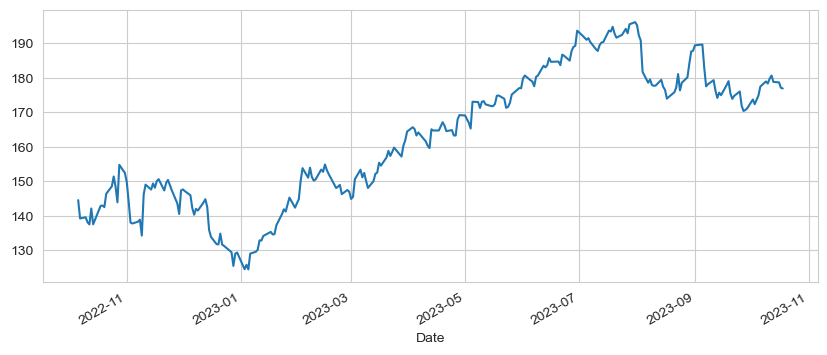

In [8]:
AAPL['Close'].plot(figsize=(10,4))

<AxesSubplot:xlabel='Date'>

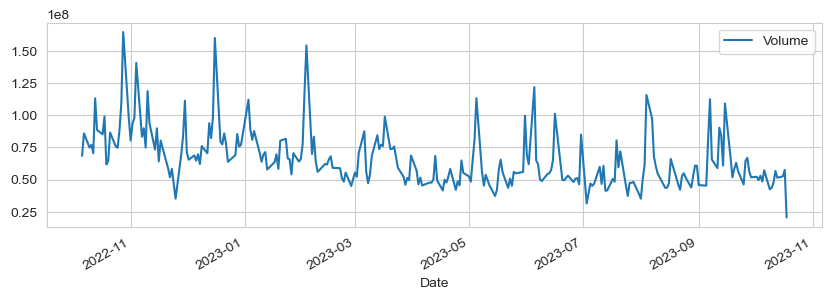

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,3))

In [10]:
moving_interval=[10,20,50]

for days in moving_interval:
    column_name=(str(days))
    AAPL[column_name]=AAPL['Close'].rolling(window=days,min_periods=1).mean()
    

In [11]:
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,10,20,50
Date,,,,,,,,,,
2022-10-06 00:00:00-04:00,144.950106,146.669899,144.363589,144.572342,68402200,0.0,0.0,144.572342,144.572342,144.572342
2022-10-07 00:00:00-04:00,141.699388,142.256098,138.627615,139.263840,85925600,0.0,0.0,141.918091,141.918091,141.918091
2022-10-10 00:00:00-04:00,139.591888,141.053220,137.752808,139.591888,74899000,0.0,0.0,141.142690,141.142690,141.142690
2022-10-11 00:00:00-04:00,139.074942,140.516403,137.404857,138.160370,77033700,0.0,0.0,140.397110,140.397110,140.397110
2022-10-12 00:00:00-04:00,138.309504,139.532246,137.345223,137.524155,70433700,0.0,0.0,139.822519,139.822519,139.822519


<AxesSubplot:xlabel='Date'>

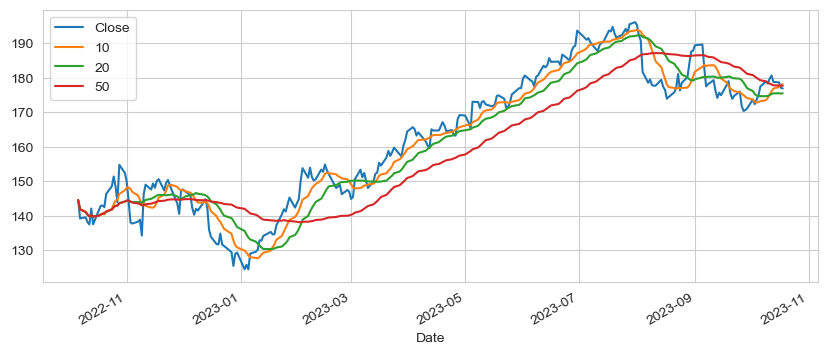

In [12]:
AAPL[['Close','10','20','50']].plot(subplots=False,legend=True,figsize=(10,4))

In [13]:
AAPL['Daily Return']=AAPL['Close'].pct_change()

In [14]:
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,10,20,50,Daily Return
Date,,,,,,,,,,,
2022-10-06 00:00:00-04:00,144.950106,146.669899,144.363589,144.572342,68402200,0.0,0.0,144.572342,144.572342,144.572342,NaN
2022-10-07 00:00:00-04:00,141.699388,142.256098,138.627615,139.263840,85925600,0.0,0.0,141.918091,141.918091,141.918091,-0.036719
2022-10-10 00:00:00-04:00,139.591888,141.053220,137.752808,139.591888,74899000,0.0,0.0,141.142690,141.142690,141.142690,0.002356
2022-10-11 00:00:00-04:00,139.074942,140.516403,137.404857,138.160370,77033700,0.0,0.0,140.397110,140.397110,140.397110,-0.010255
2022-10-12 00:00:00-04:00,138.309504,139.532246,137.345223,137.524155,70433700,0.0,0.0,139.822519,139.822519,139.822519,-0.004605


<AxesSubplot:xlabel='Date'>

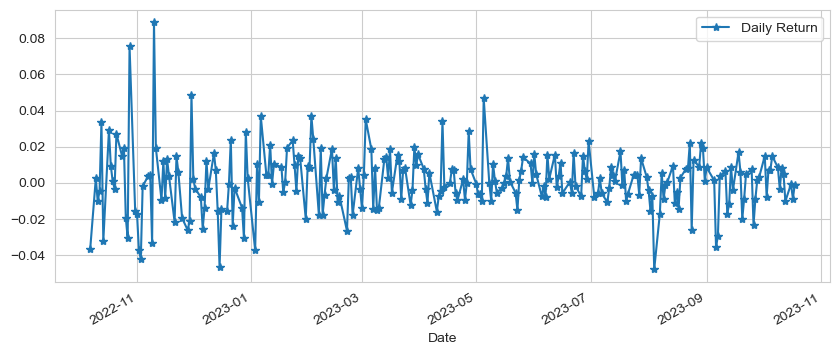

In [15]:
AAPL['Daily Return'].plot(legend=True,figsize=(10,4),marker='*')

In [16]:
ser1=Series(AAPL['Close'])
ser2=Series(GOOG['Close'])
ser3=Series(MSFT['Close'])
ser4=Series(AMZN['Close'])

In [17]:
ser5=pd.concat([ser1,ser2,ser3,ser4],axis=1)
ser5.columns=['AAPL','GOOG','MSFT','AMZN']
ser5

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-10-06 00:00:00-04:00,144.572342,102.239998,244.428619,120.300003
2022-10-07 00:00:00-04:00,139.263840,99.570000,231.998734,114.559998
2022-10-10 00:00:00-04:00,139.591888,98.709999,227.056458,113.669998
2022-10-11 00:00:00-04:00,138.160370,98.050003,223.253189,112.209999
2022-10-12 00:00:00-04:00,137.524155,98.300003,223.589935,112.900002
...,...,...,...,...
2023-10-12 00:00:00-04:00,180.710007,140.289993,331.160004,132.330002
2023-10-13 00:00:00-04:00,178.850006,138.580002,327.730011,129.789993
2023-10-16 00:00:00-04:00,178.720001,140.490005,332.640015,132.550003


In [18]:
tech_pct=ser5.pct_change()

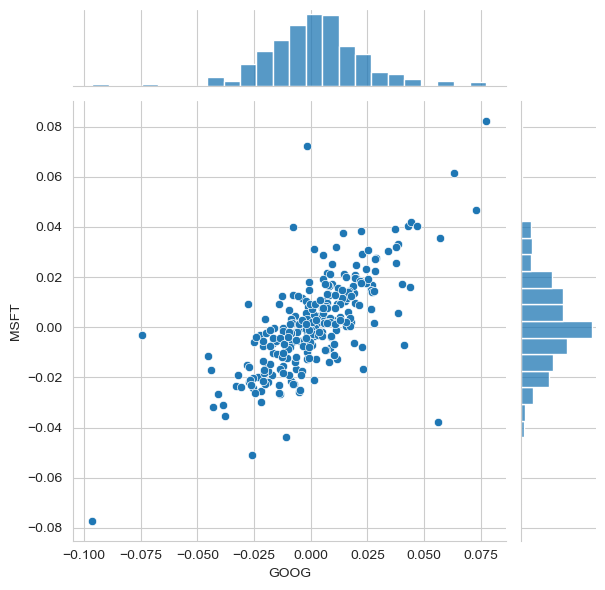

In [19]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_pct,kind='scatter')

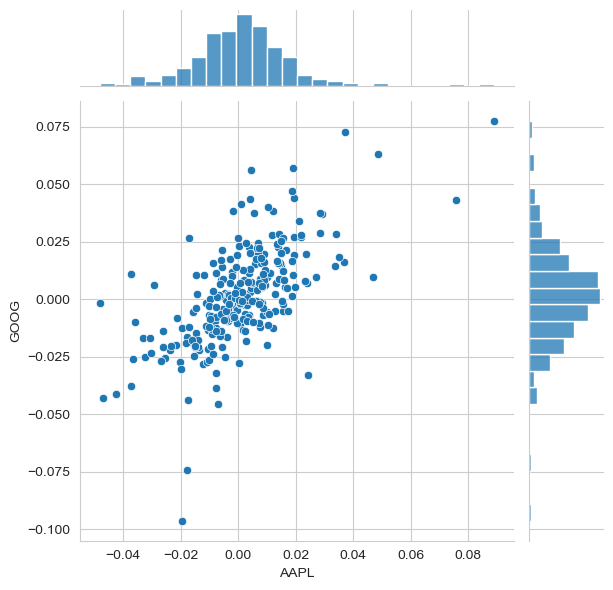

In [20]:
sns.jointplot(x='AAPL',y='GOOG',data=tech_pct,kind='scatter')

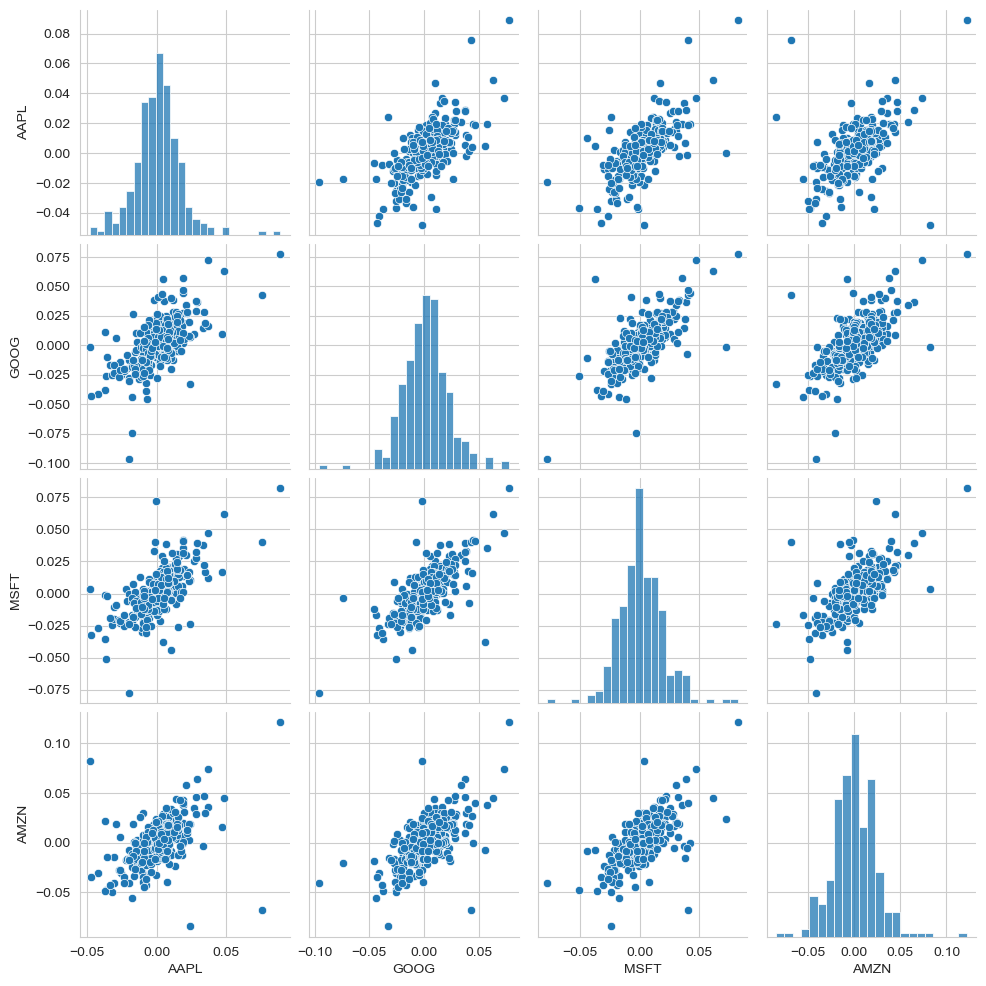

In [21]:
sns.pairplot(tech_pct.dropna())

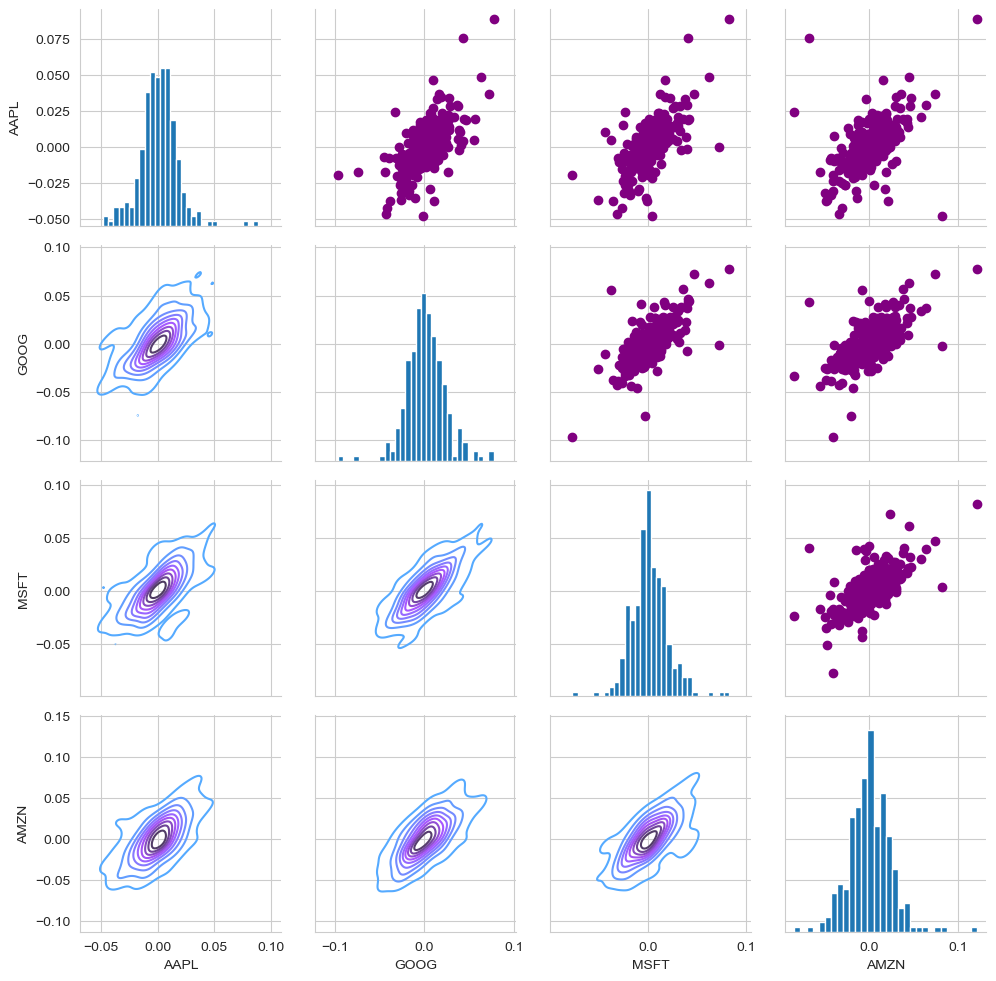

In [22]:
return_fig=sns.PairGrid(tech_pct.dropna())

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

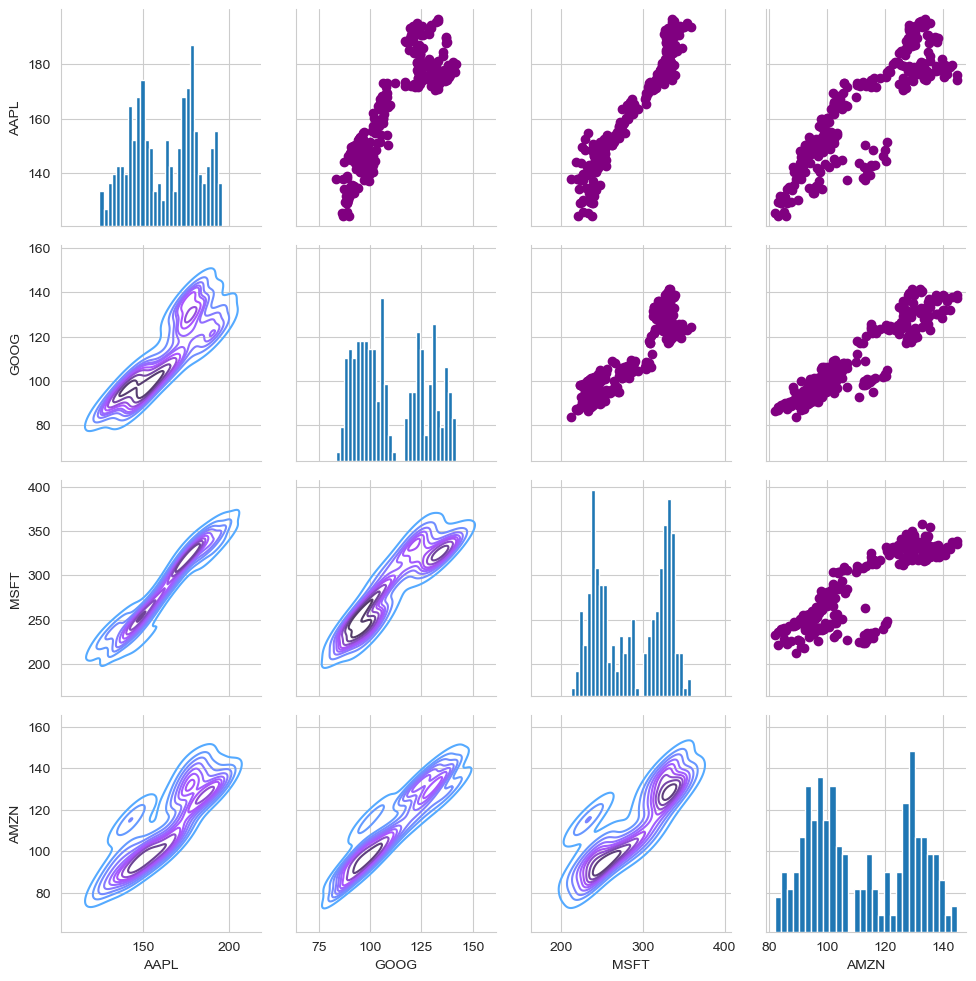

In [23]:
return_fig=sns.PairGrid(ser5)

return_fig.map_upper(plt.scatter,color='purple')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

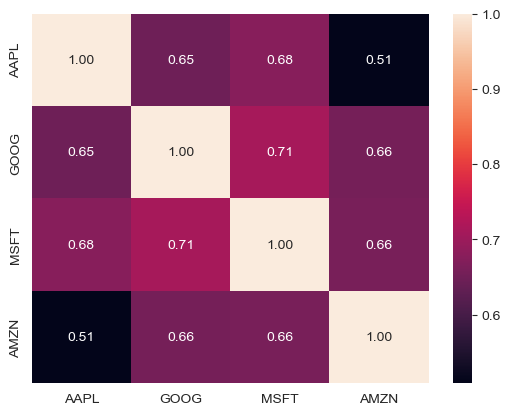

In [24]:
tech_pct_corr=tech_pct.dropna().corr()
sns.heatmap(tech_pct_corr,annot=True,fmt='0.2f')

In [25]:
pct=tech_pct.dropna()

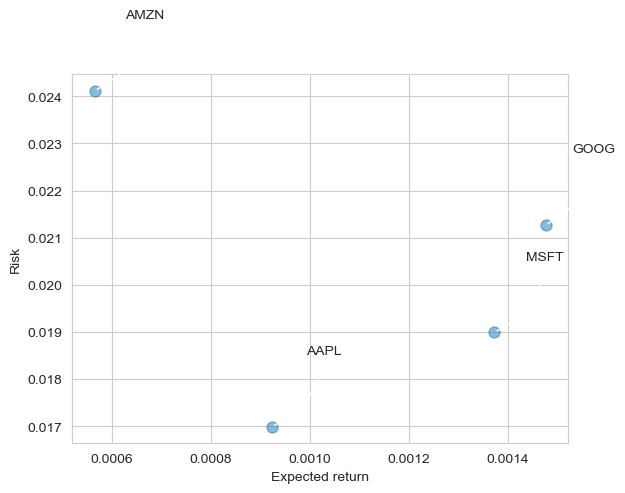

In [26]:
area=np.pi*20

plt.scatter(x=pct.mean(),y=pct.std(),alpha=0.5,s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(pct.columns, pct.mean(), pct.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))